# Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Goal:
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- Those will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


### Importing libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from  sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')

### Step 1 : Data loading and Understanding of Dataset

In [30]:
df= pd.read_csv("C:\\Users\\ragha\\Downloads\\day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

#### Null value check

In [8]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Total Number of rows in Dataset: 730
#### Total Number of columns in Dataset : 16
#### Total columns/rows with null values : 0

### Step 2 : Data Cleaning

In [11]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### Dropping of Duplicates

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(730, 16)

##### Since the shape of dataset before and after dropping of duplicates is same. So, we can conclude that there are no duplicates in the dataset

##### Columns with complete unquie values across the dataset which won't help in analysis

- instant is a row index
- dteday has date which we can get by combining other columns month and year
- casual and registered are the break up of column 'cnt' which is a target variable

In [33]:
# Dropping colums
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Encoding of season variable

In [34]:
df['season']= df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
df['season'].nunique()

4

##### Encoding of weathersit variable

In [37]:
df['weathersit']= df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [38]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
# let's rename the columns for more understanding and readability

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [40]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Encoding of Month and weekday

In [41]:
# month

df['month']= df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# weekday
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [42]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 3 : Data visualization

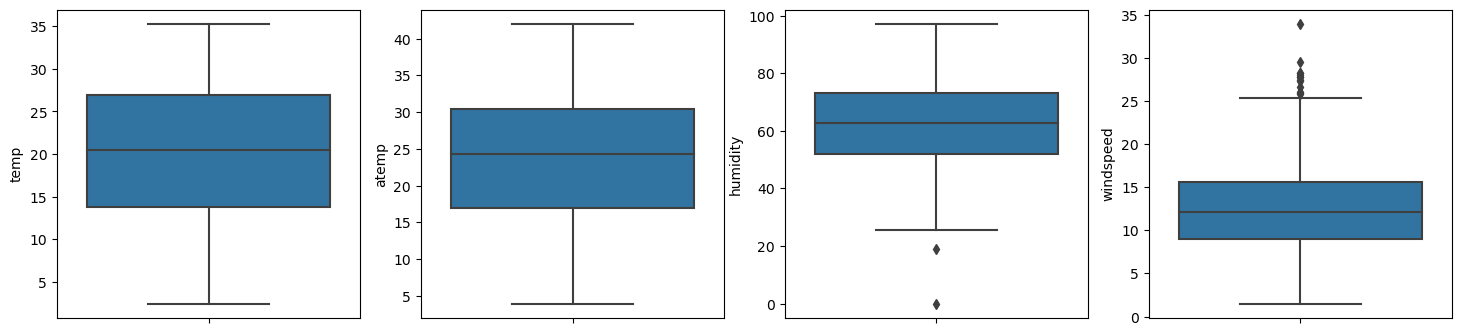

In [61]:
# let's draw box plot for variables which are independent with continous values
cols_inp= ['temp','atemp','humidity','windspeed']
plt.figure(figsize=(18,4))

i=1
for col in cols_inp:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=df)
    i+=1
plt.show()

##### From the above box plot we can conclude that there are no outliers to be handled.

In [64]:
cont_cols = ['cnt', 'temp', 'atemp', 'humidity','windspeed']
cat_cols = ['season','month','year','weekday','weathersit','workingday','holiday']
target = ['cnt']

#### Univariant Analysis

##### Pair plots for continous variables

<Figure size 1500x3000 with 0 Axes>

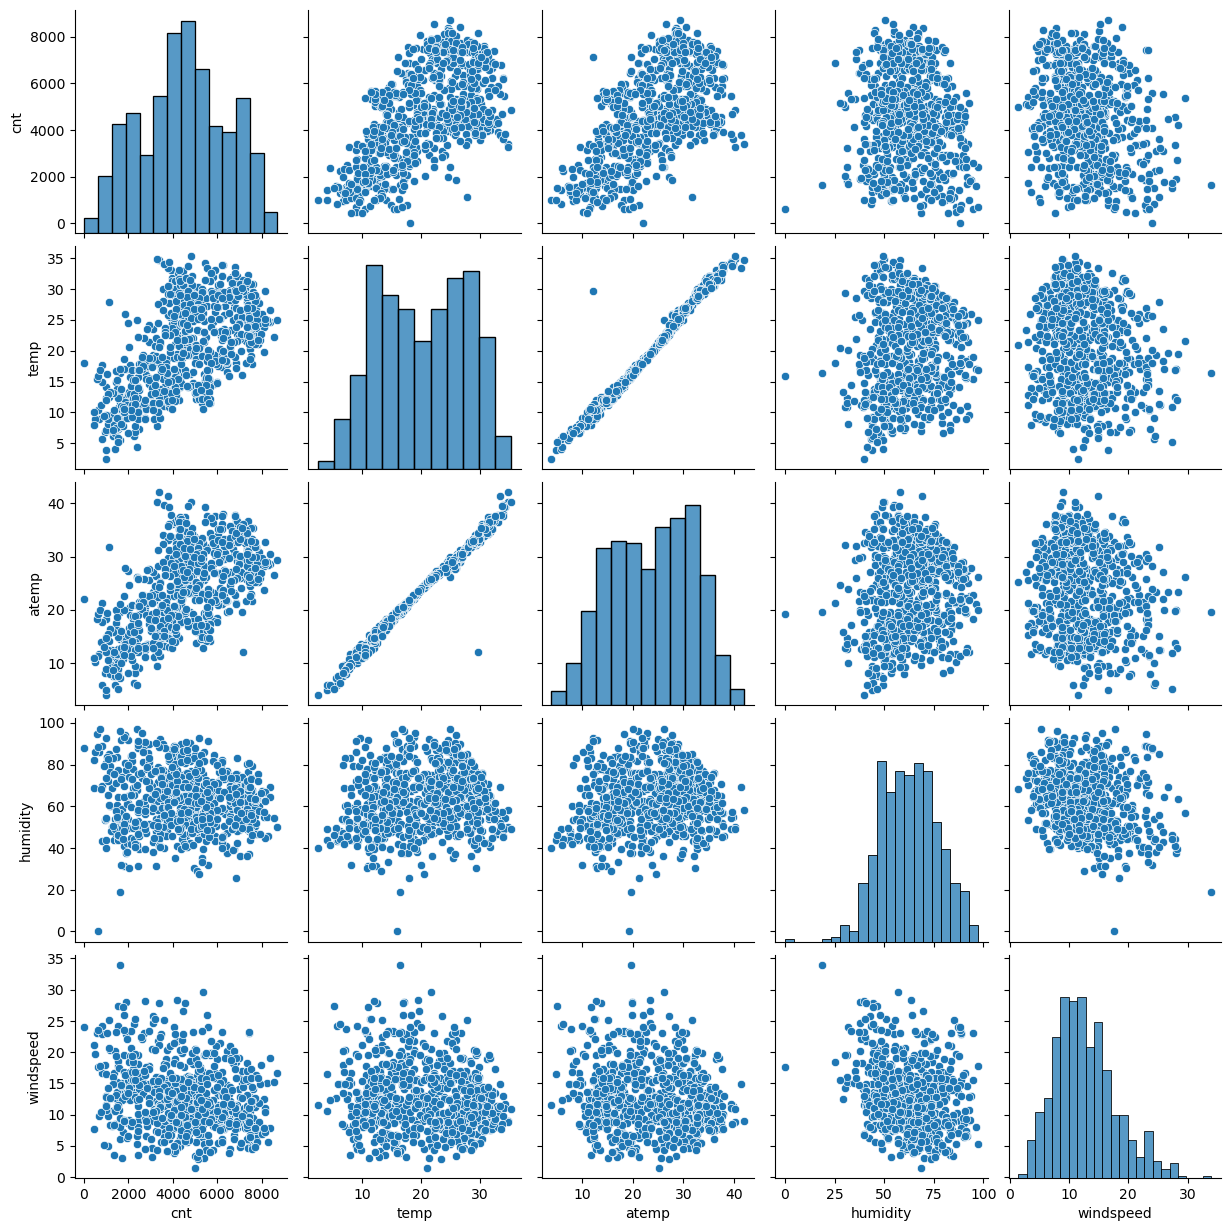

In [65]:
plt.figure(figsize=(15,30))
sns.pairplot(vars=cont_cols,data=df)
plt.show()

<b>Observation:</b> We can infer the below points from above pairplot

    1. The 'temp' and 'atemp' variables are having high corelation with target variable 'cnt'
    2. The 'temp' and 'atemp' variables are highly corelated with each other

##### Corelation between Numeric variables

<Figure size 2000x1500 with 0 Axes>

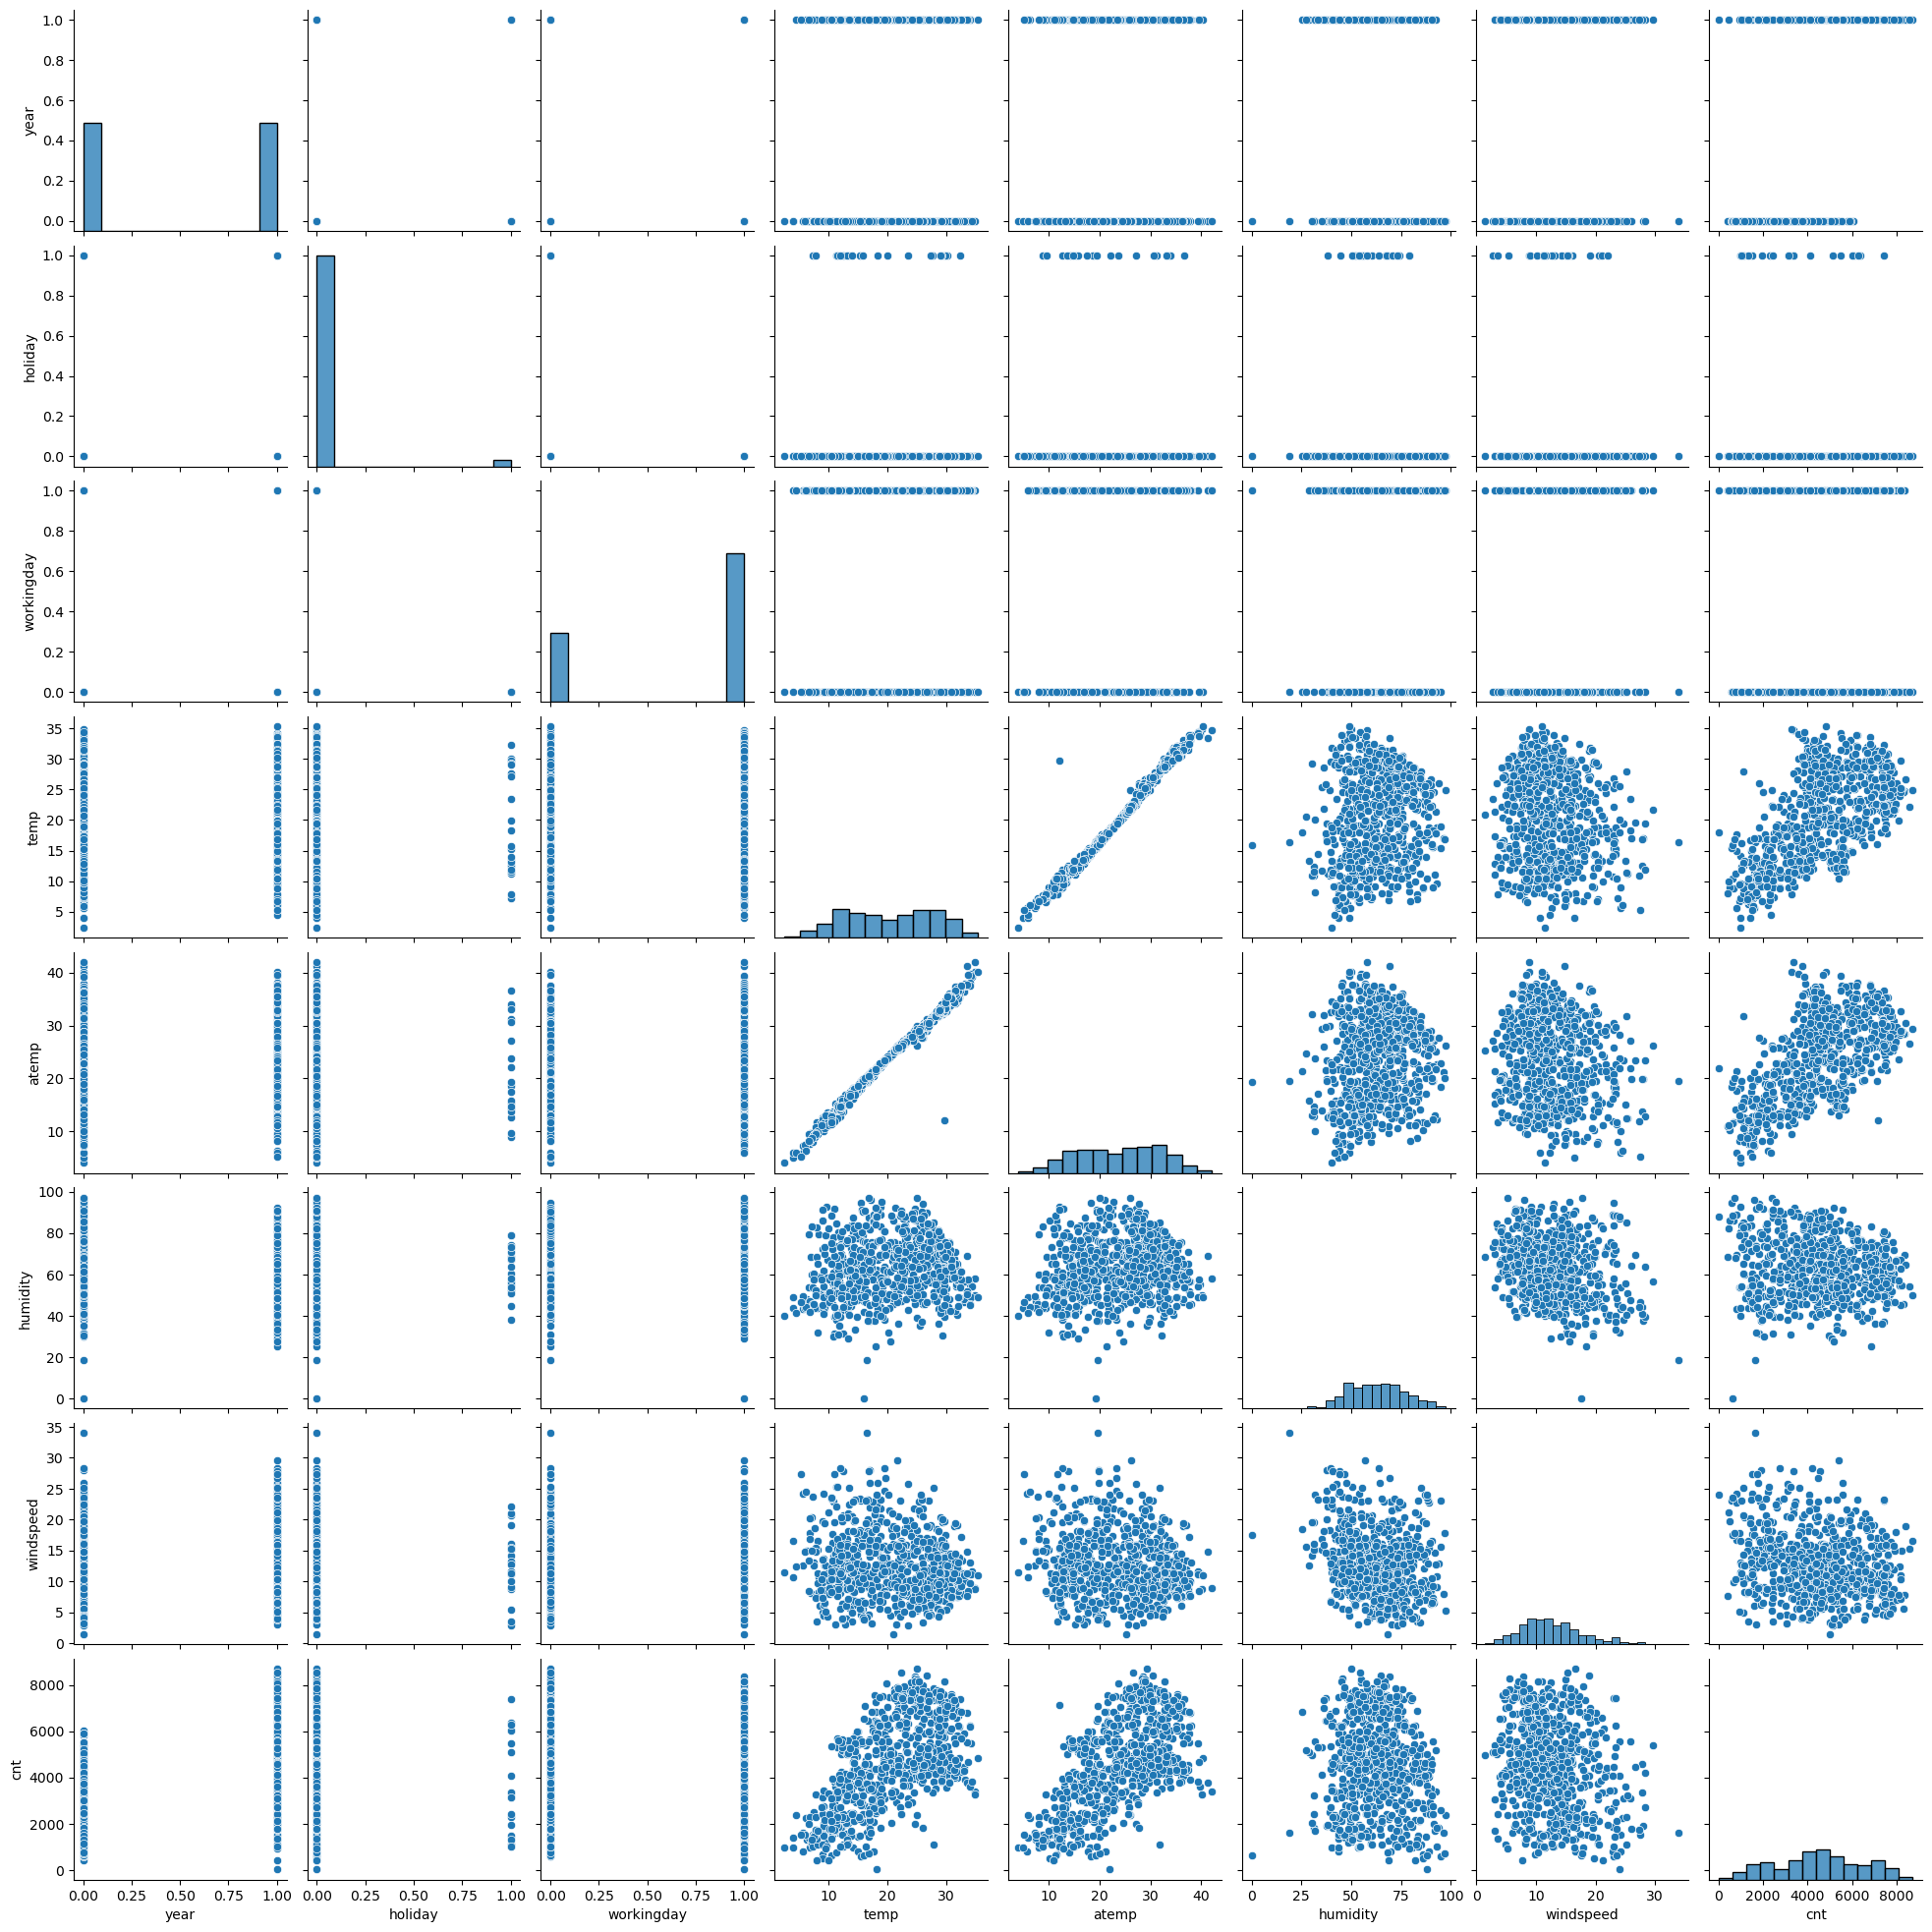

In [71]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

<b>Observation:</b> We can clearly infer that the corealtion between 'atemp' and 'temp' is high

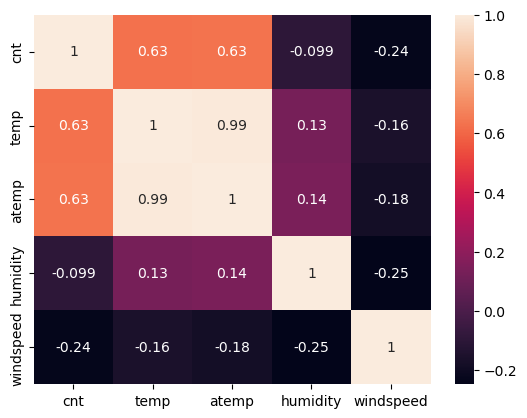

In [72]:
# Heat map for continous variables
sns.heatmap(df[cols_cont].corr(),annot=True)
plt.show()

<b>Observation:</b> From above heat map we can infer the correaltion between 'atemp' and 'temp' is 0.99 which means these two 
    are highly correalted

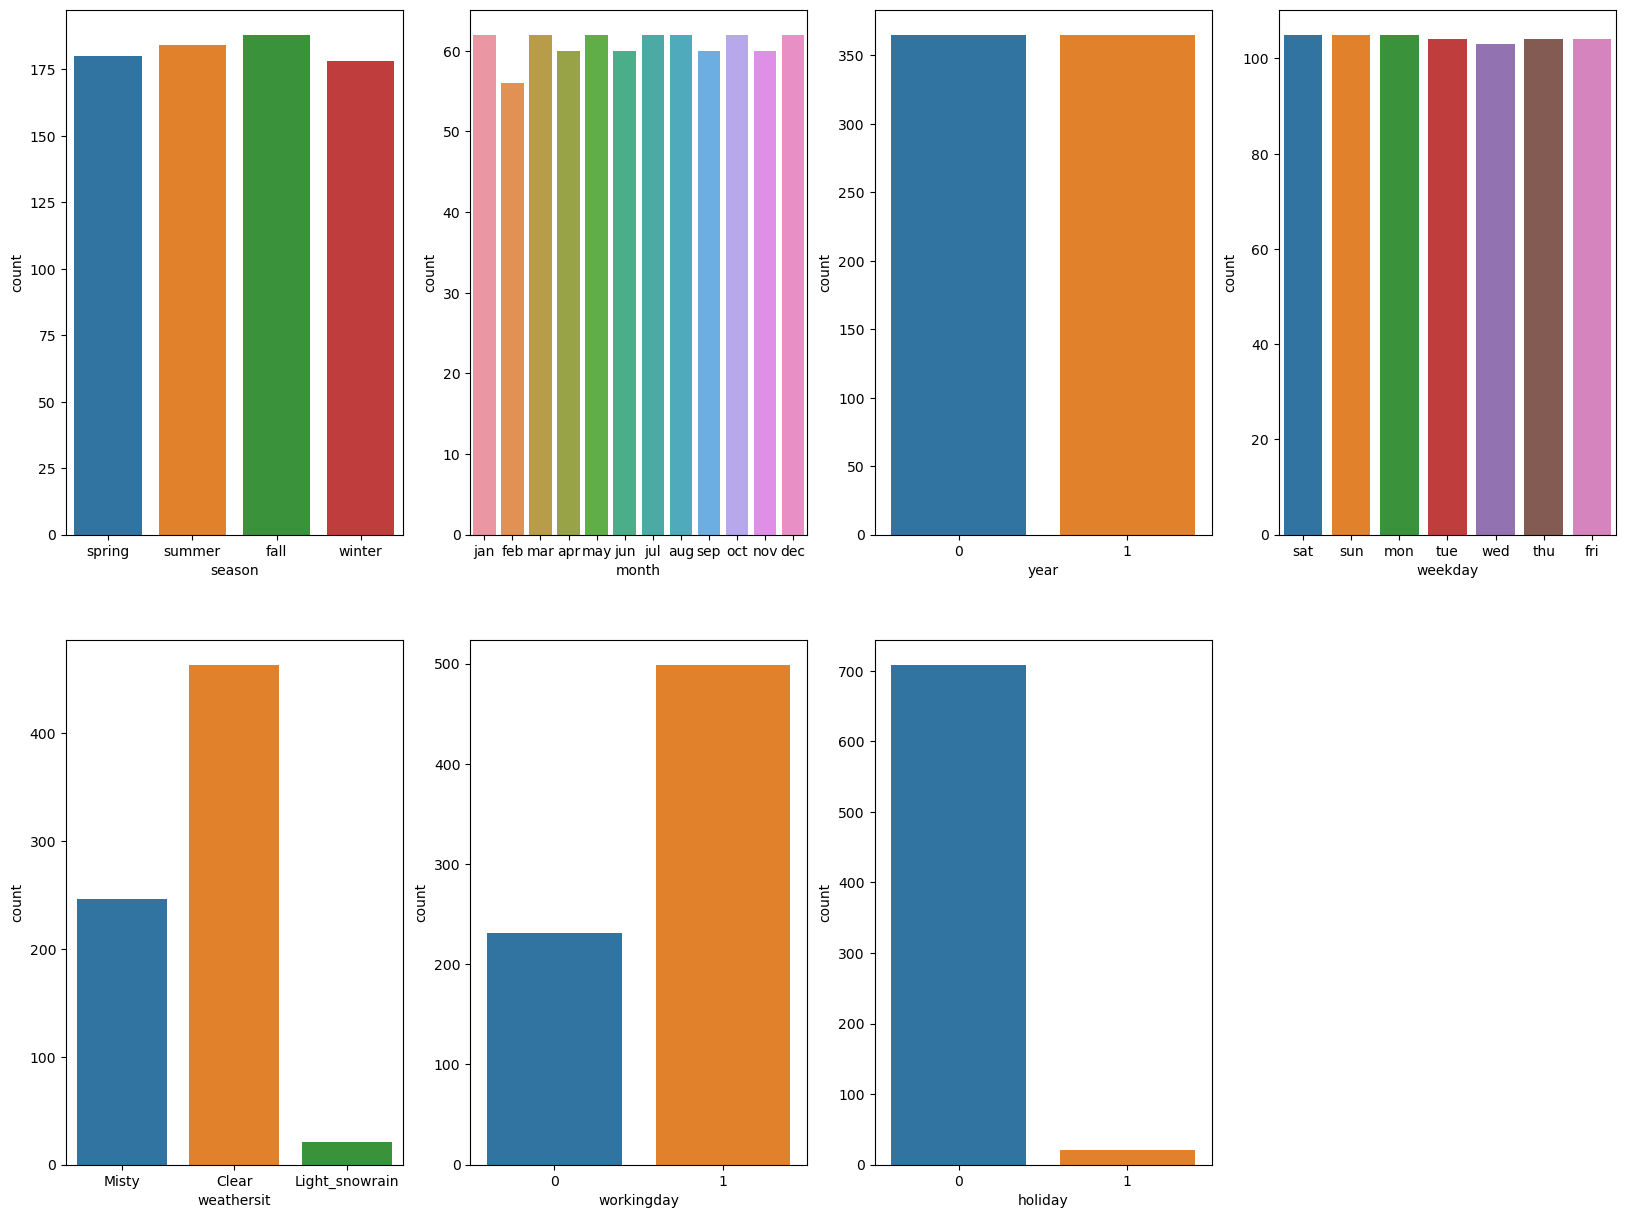

In [69]:
plt.figure(figsize=(20,15))
i=1
for col in cat_cols:
    plt.subplot(2,4,i)
    sns.countplot(x=df[col])
    i+=1
plt.show()

##### Correaltion between varaibles

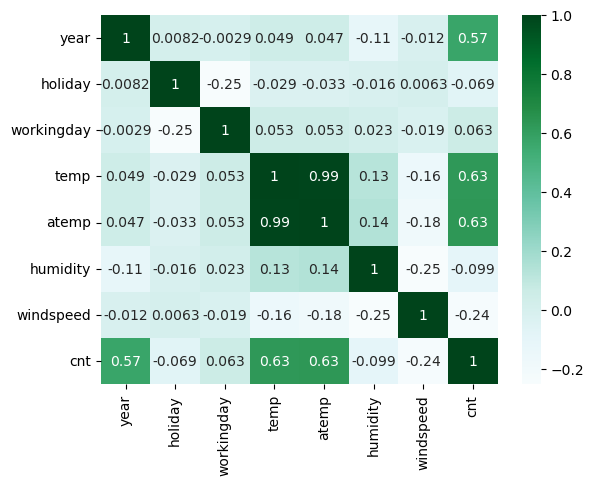

In [75]:
sns.heatmap(df.corr(),annot=True,cmap='BuGn')
plt.show()

<b>Observation:</b> There is a linear correaltion between temp and atemp. Both varaibles cannot be used in model building due
    to its multicolinearity. We can decide which varible to retain by using VIF and p-values w.r.t other variables

#### Bivariant Analysis

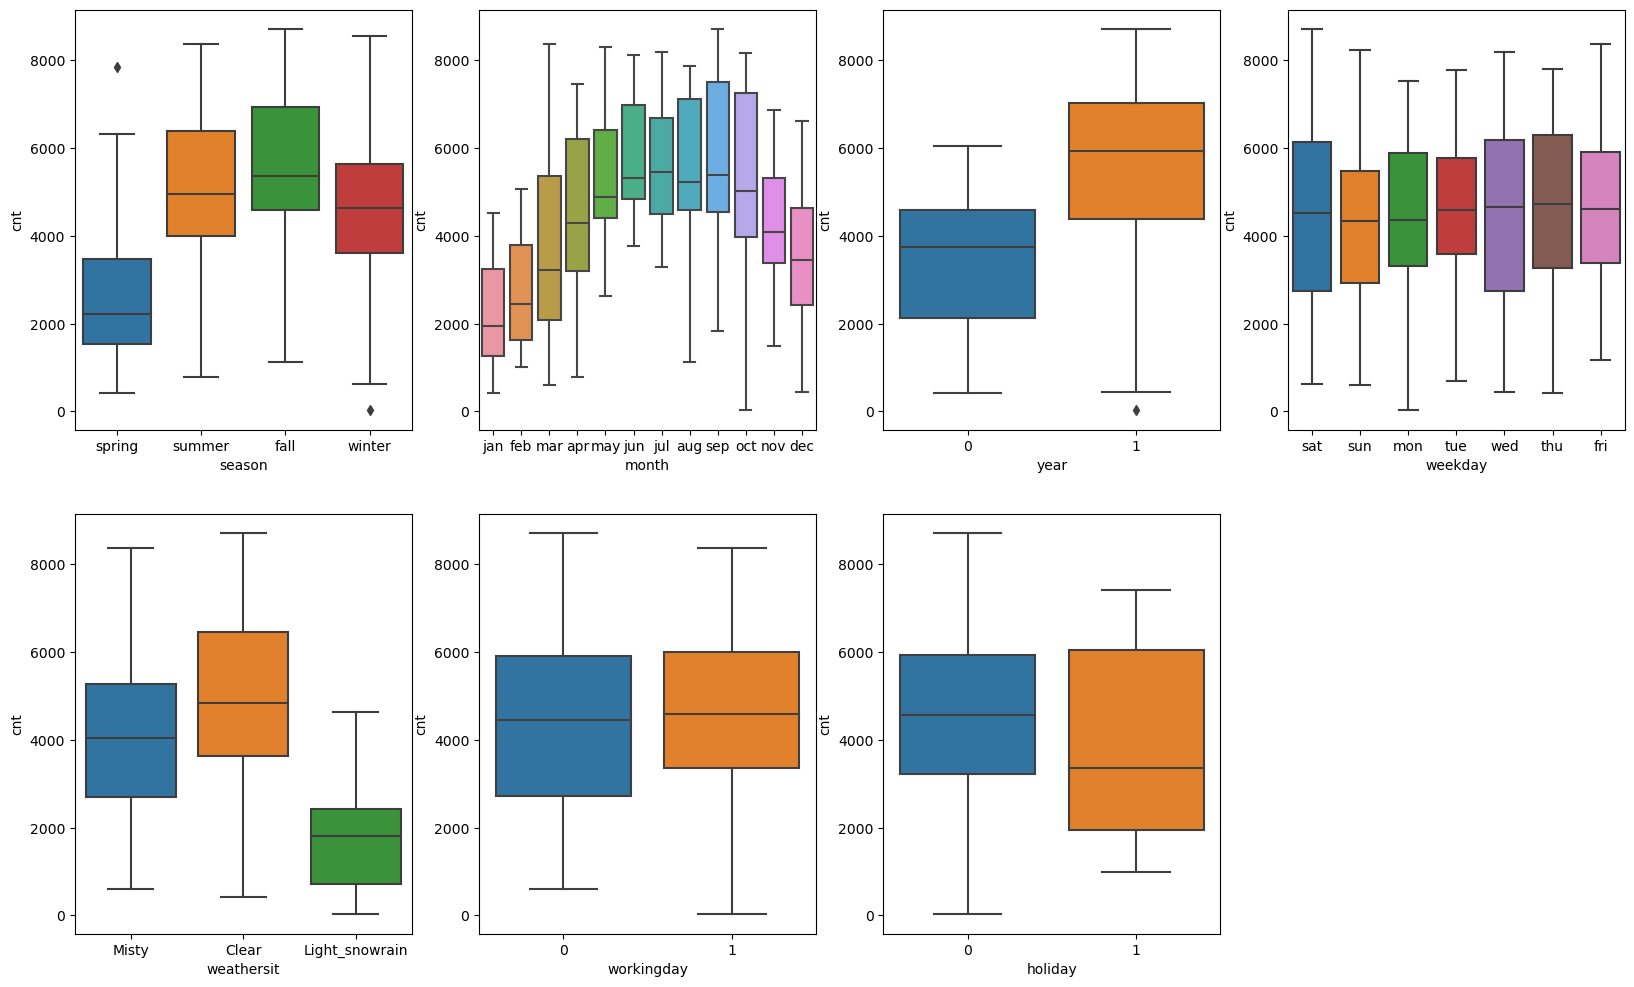

In [57]:
plt.figure(figsize=(20,12))
i=1
for col in cat_cols:
    plt.subplot(2,4,i)
    sns.boxplot(x=col,y='cnt',data=df)
    i+=1
plt.show()

<b>Observation:</b> From the above box plot we can infer the below points
    
    1. Season with value 'fall' signifies the highest demand for rental bikes
    2. Month: The box plot shows the significant improvement in demand for rental bikes month on month till 'June'
              whereas in the month of 'September' the demand is high than other months and there after the demand for rental                   bikes started declining
    3. Year: The demand for rental bikes increased year on year
    4. Weekday: The demand is high on 'Saturdays'
    5. Weathersit: The demand is high when the weathersit is 'Clear'
    6. Workingday: During 'non-working day' the demand is high
    7. Holiday: If there is a 'Holiday' then demand is reduced 

#### Regplot between target variables and other

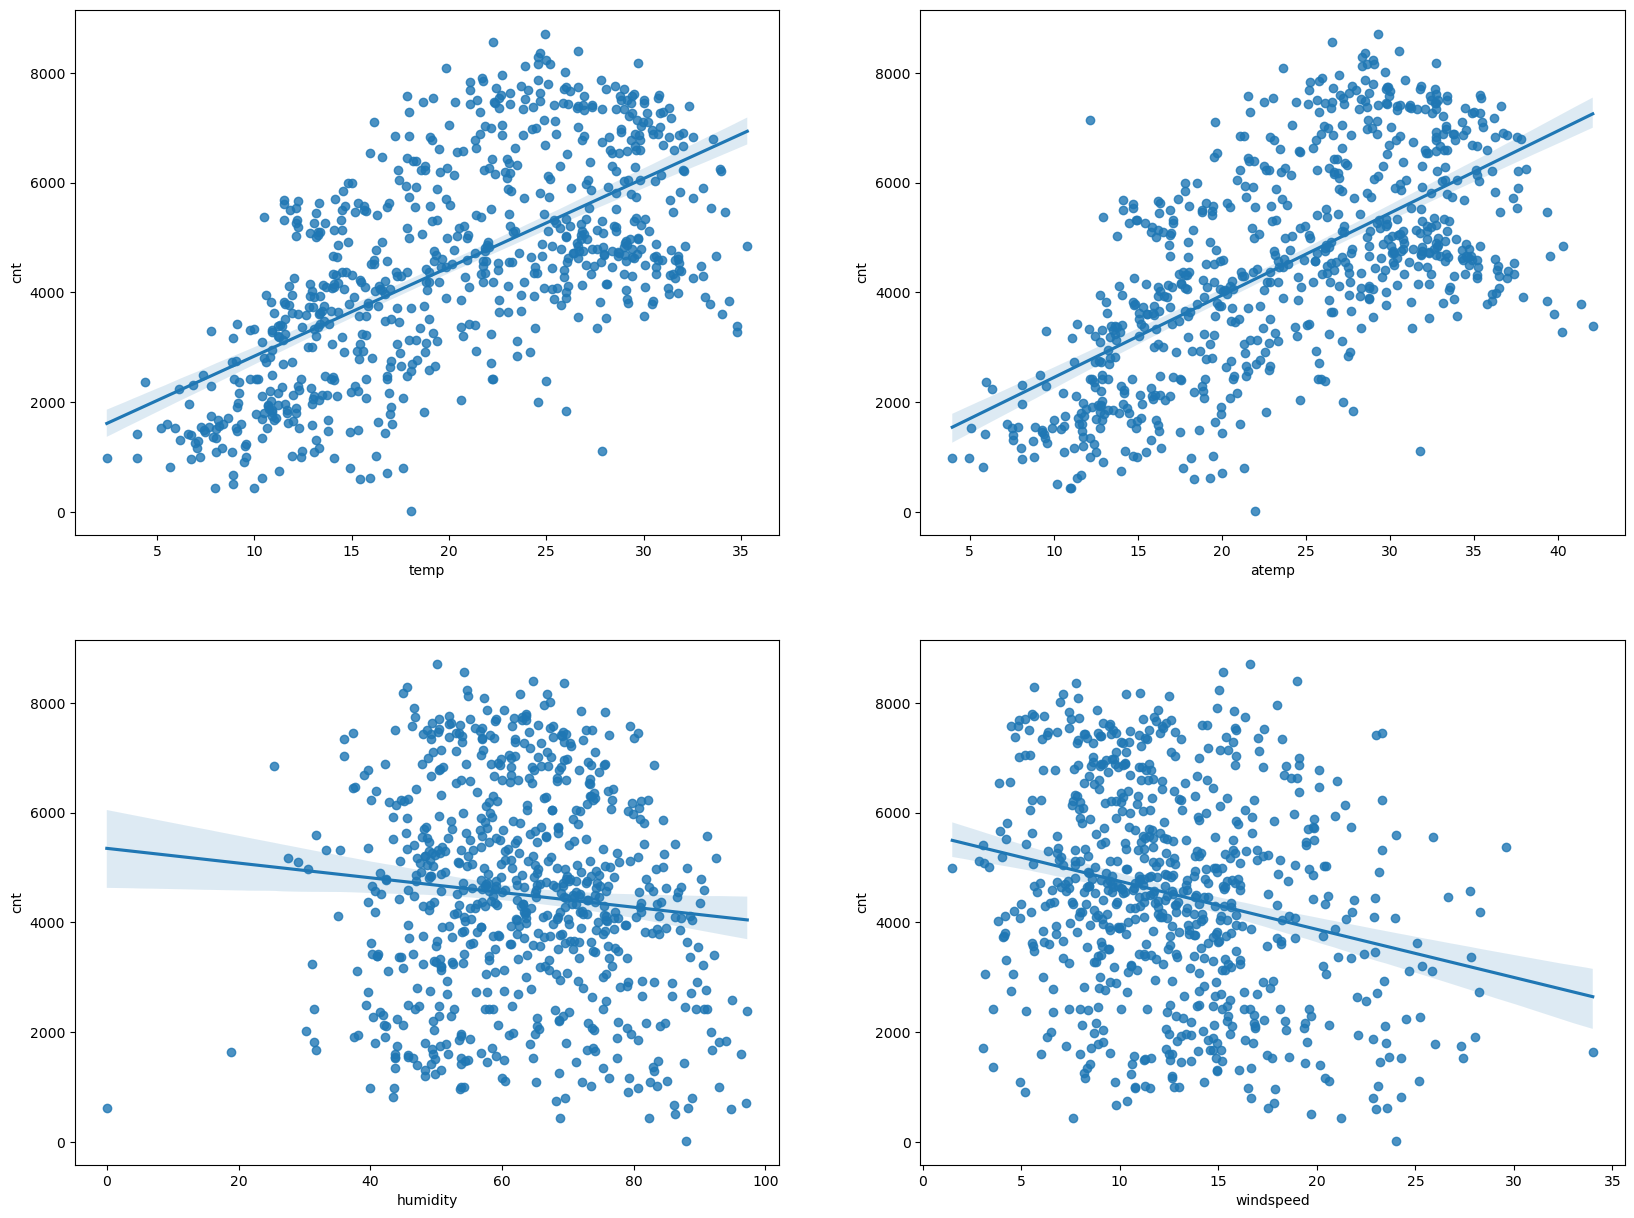

In [78]:
plt.figure(figsize=(20,15))
i=1
reg_cols = ['temp', 'atemp', 'humidity','windspeed']
for col in reg_cols:
    plt.subplot(2,2,i)
    sns.regplot(x=col,y='cnt',data=df)
    i+=1
plt.show()

<b>Observations:</b> From the above regplot we can infer the below points
  1. Temp: The demand of bikes is positively correlated with target variable
  2. Atemp: This variable is also positively correlated with target variable
  3. Humidity: The values are more scattered around and there is decling w.r.t target variable
  4. Windspeed: The values are more scattered towards the begining and there is a decline in trend w.r.t target variable

### Step 4: Linear Regression Data Preparation

##### Step 4.1: Dummy Variable creation

In [81]:
season = pd.get_dummies(df['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [82]:
month = pd.get_dummies(df['month'],drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [84]:
weekday = pd.get_dummies(df['weekday'],drop_first=True)
weekday

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [85]:
weathersit = pd.get_dummies(df['weathersit'],drop_first=True)
weathersit

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [86]:
df_with_dummies = pd.concat([df,month,weekday,weathersit,season],axis=1)
df_with_dummies.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


##### Step 4.2: Dropping of original columns which are replaced with dummy values

In [87]:
df_with_dummies.drop(['month','weekday','season','weathersit'],axis=1,inplace=True)
df_with_dummies.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [88]:
df_with_dummies.shape

(730, 30)

##### Step 4.3: Data Spliting

In [274]:
df_train,df_test = train_test_split(df_with_dummies,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


###### Step 4.4: Rescaling of variables using MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [95]:
# numeric variables
num_vars = cols_cont
num_vars

['cnt', 'temp', 'atemp', 'humidity', 'windspeed']

###### Step 4.5: Fit the model

In [108]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


### Step 5: Model Training

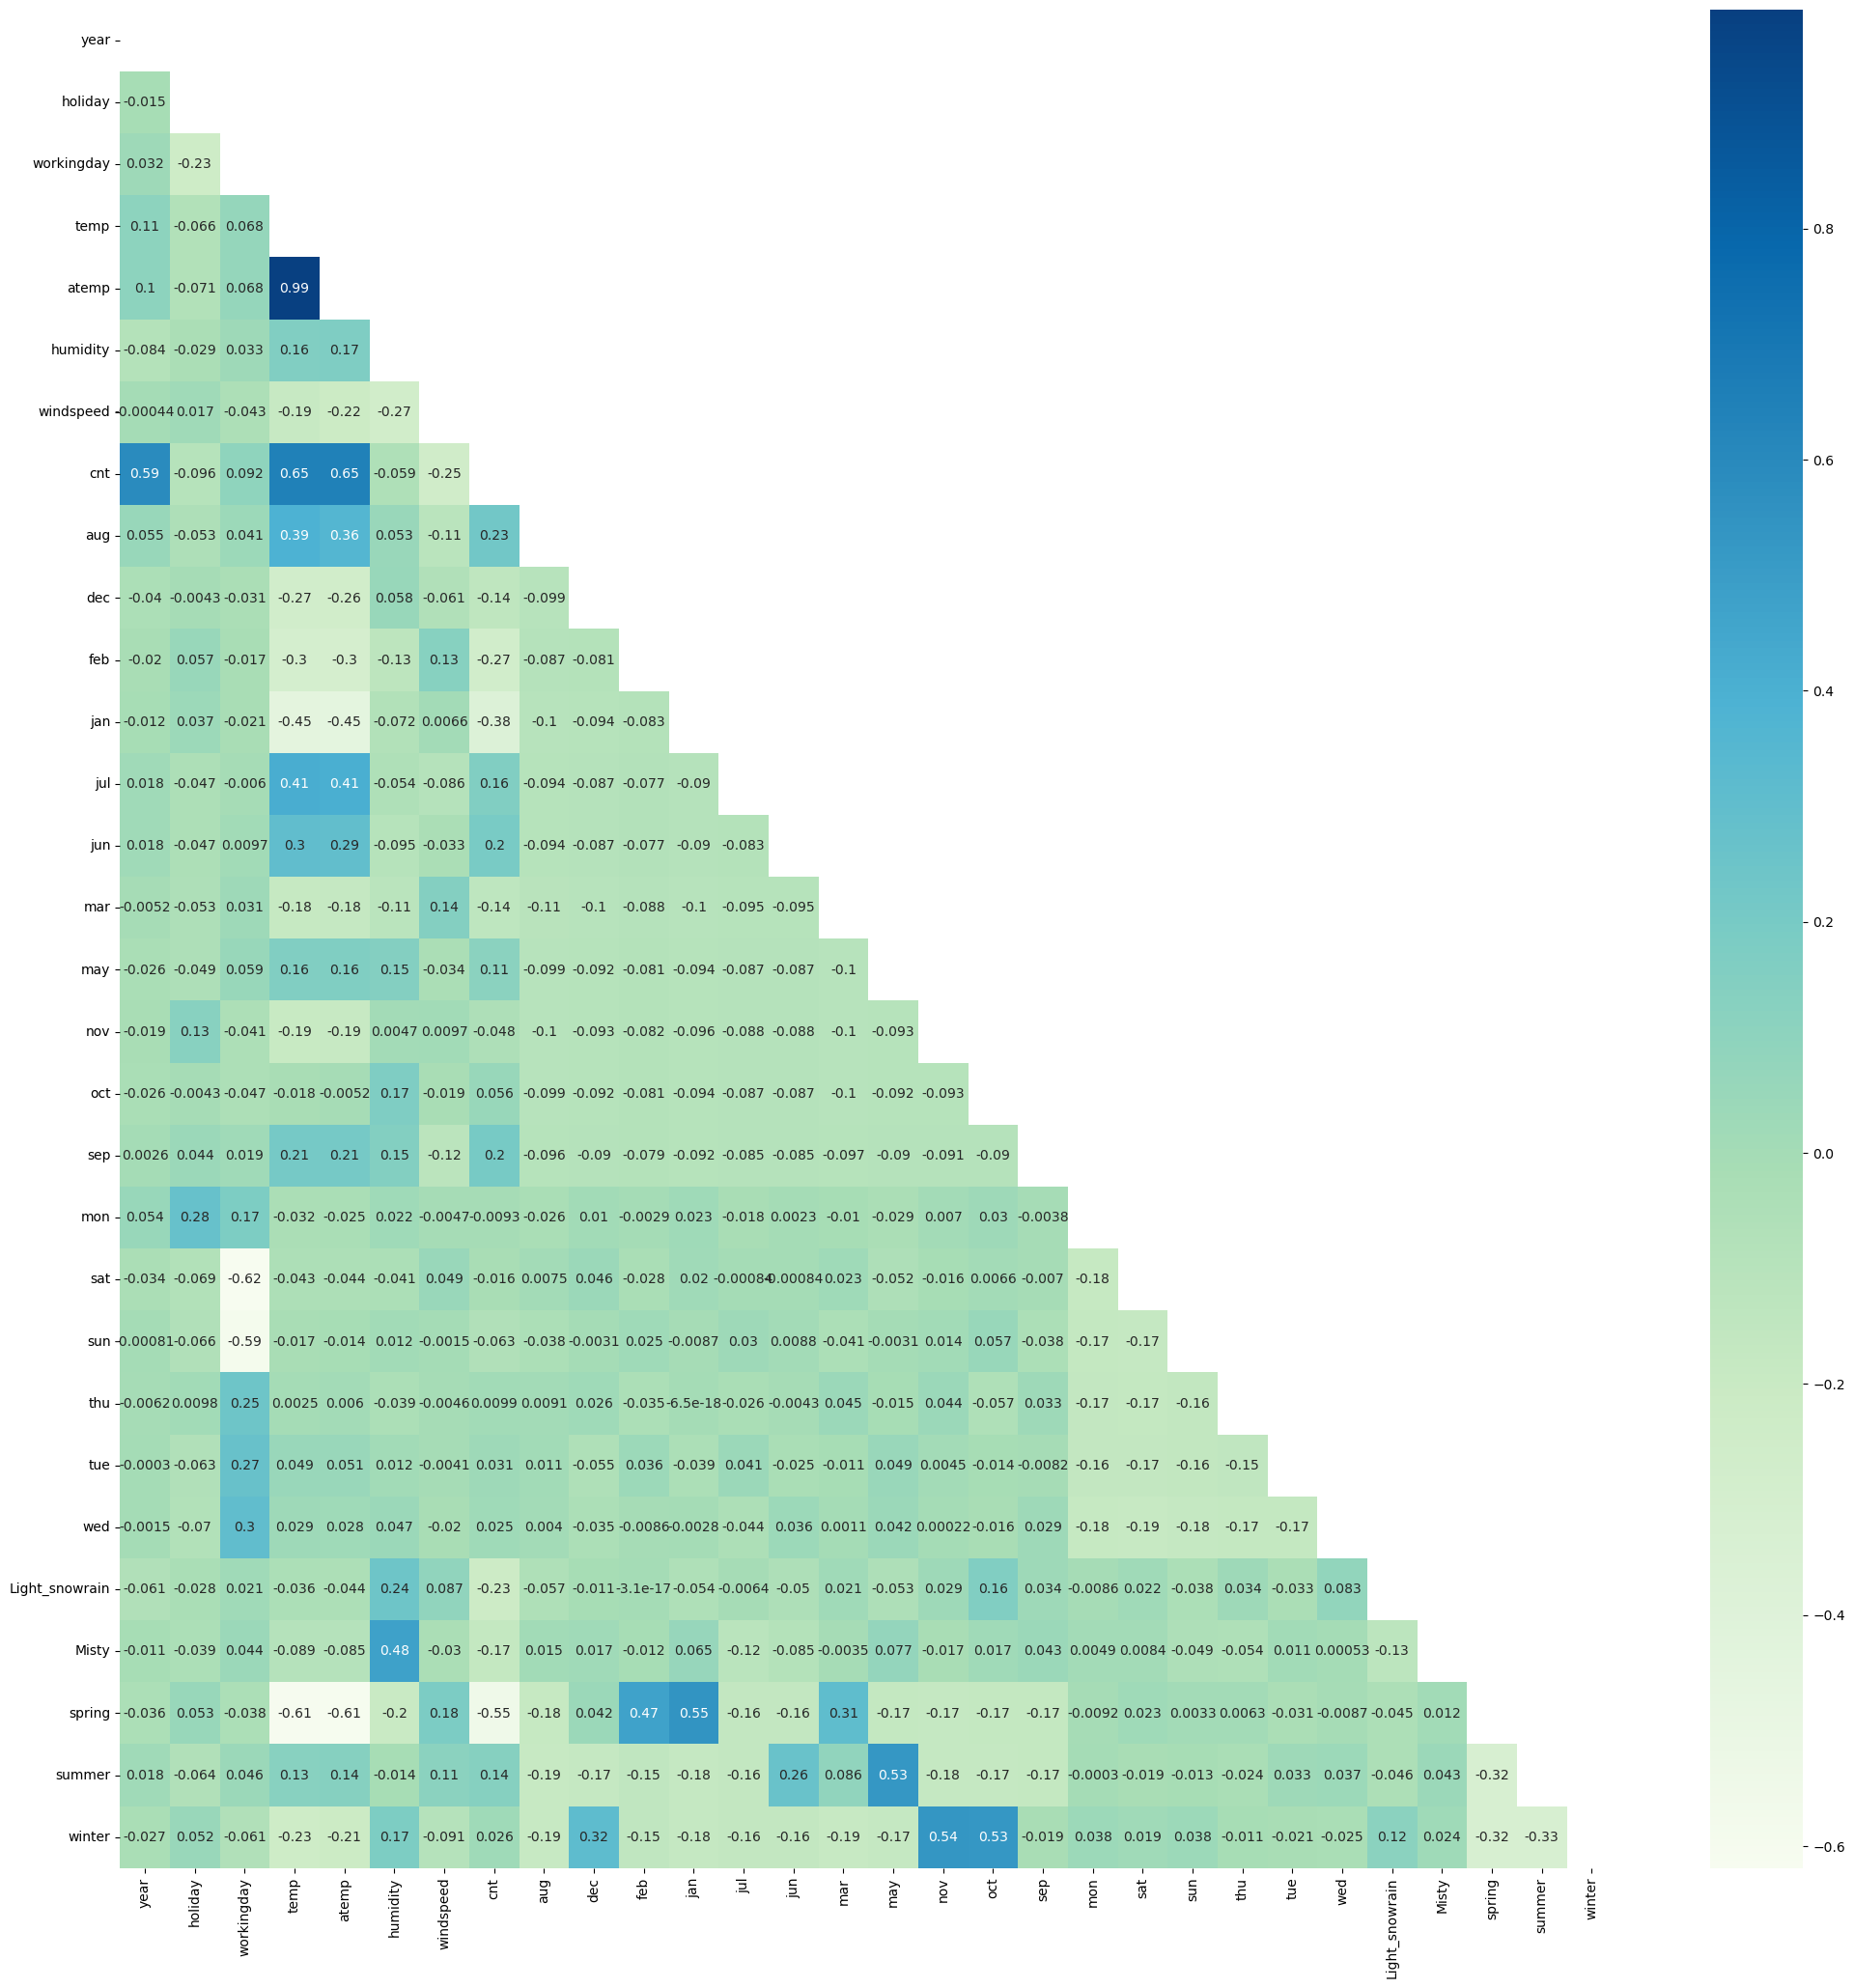

In [109]:
plt.figure(figsize=(25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(),annot=True,cmap='GnBu',mask=matrix)
plt.show()

<b>Observation:</b> From the above heat map we can infer that cnt seems to have correlation with 'Year' and 'Temp'.
    Similarly 'Misty' and 'Humidity' shows correlation. Spring season with 'Jan' and 'Feb' month at the same time Summer season
    with 'May' month and winter season with 'October' and 'November' months shows the good correaltion.

##### Step 5.1: Building Linear Model

In [110]:
# dropping target variable
y_train = df_train.pop('cnt')
X_train = df_train

In [111]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [112]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Step 5.2: Recursive Feature Elimination

In [113]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [114]:
lm.coef_

array([ 2.32538717e-01, -1.20995072e+13, -1.20995072e+13,  4.80553874e-01,
       -2.73107733e-02, -1.52963981e-01, -1.80828160e-01, -3.01584095e-02,
       -4.61638972e-02, -6.03856881e-02, -7.40530537e-02, -7.62942867e-02,
       -9.24838644e-03,  8.20124816e-03,  1.40118540e-02, -6.71031874e-02,
       -7.79397132e-03,  5.27847881e-02,  3.52204020e-03, -1.20995072e+13,
       -1.20995072e+13,  2.66496243e-02, -2.08277082e-02,  5.70839893e-03,
       -2.53039360e-01, -5.69347273e-02, -7.54595408e-02,  9.04742767e-03,
        8.72935557e-02])

In [115]:
# Running RFE with the output number of the variable equal to 15
rfe= RFE(lm,n_features_to_select=15)

In [116]:
rfe = rfe.fit(X_train,y_train)

In [117]:
rfe.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 0}

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 14),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [119]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jul',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [120]:
# columns that are rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [215]:
X_train_rfe = X_train[rfe_cols]
X_train_rfe

,year,holiday,workingday,temp,humidity,windspeed,jul,sep,sat,sun,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,1,0,1,0


In [216]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=True)
    return vif

In [217]:
calculate_vif(X_train_rfe)

,Features,VIF
0,year,1.03
5,windspeed,1.20
10,Light_snowrain,1.25
7,sep,1.30
6,jul,1.49
11,Misty,1.57
4,humidity,1.91
13,summer,2.62
1,holiday,2.91
14,winter,3.49


<b>Observation:</b> Workingday is having highest VIF value

### Step 5.3: Building Linear Model

In [218]:
# Building 1st linear model
X_train_sm= sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        23:07:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.200      0.000       0.145       0.254
year               0.2298      0.008     28.647      0.000       0.214       0.246
holiday           -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday         0.0837      0.010      8.665      0.000       0.065       0.103
temp               0.5277      0.033     15.884      0.000       0.462       0.593
humidity          -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                0.0820      0.017      4.966      0.000       0.050       0.114
sat                0.0937      0.012      8.040      0.000       0.071       0.117
sun                0.0406      0.012      3.315      0.001       0.017       0.065
Light_snowrain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty             -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer             0.0537      0.015      3.631      0.000       0.025       0.083
winter             0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [219]:
# lets drop 'workingday' as it is having high VIF and low p-value
X_train_new = X_train_rfe.drop(['workingday'],axis=1)

In [220]:
# lets recalculate the VIF
calculate_vif(X_train_new)

,Features,VIF
1,holiday,1.06
7,sat,1.23
8,sun,1.23
9,Light_snowrain,1.24
6,sep,1.39
5,jul,1.59
0,year,2.08
10,Misty,2.30
12,summer,2.79
13,winter,3.36


In [221]:
X_train_2= sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        23:07:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2832      0.034      8.300      0.000       0.216       0.350
year               0.2298      0.008     28.647      0.000       0.214       0.246
holiday           -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp               0.5277      0.033     15.884      0.000       0.462       0.593
humidity          -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                0.0820      0.017      4.966      0.000       0.050       0.114
sat                0.0100      0.011      0.897      0.370      -0.012       0.032
sun               -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light_snowrain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty             -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring            -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer             0.0537      0.015      3.631      0.000       0.025       0.083
winter             0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observation:</b> Humidity is having High VIF and High p-value

In [222]:
# lets drop 'humidity' as it is having high VIF and low p-value
X_train_3 = X_train_2.drop(['humidity'],axis=1)

In [223]:
# lets recalculate the VIF
calculate_vif(X_train_3)

,Features,VIF
1,year,1.02
2,holiday,1.03
7,sat,1.05
8,sun,1.05
9,Light_snowrain,1.05
10,Misty,1.05
4,windspeed,1.10
6,sep,1.29
5,jul,1.48
12,summer,2.60


In [224]:
X_train_4= sm.add_constant(X_train_3)
lr_3 = sm.OLS(y_train,X_train_4).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.28e-188
Time:                        23:08:16   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2037      0.029      6.972      0.000       0.146       0.261
year               0.2337      0.008     28.828      0.000       0.218       0.250
holiday           -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
jul               -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep                0.0759      0.017      4.537      0.000       0.043       0.109
sat                0.0118      0.011      1.037      0.300      -0.011       0.034
sun               -0.0461      0.012     -3.931      0.000      -0.069      -0.023
Light_snowrain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Misty             -0.0822      0.009     -9.514      0.000      -0.099      -0.065
spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer             0.0477      0.015      3.180      0.002       0.018       0.077
winter             0.0846      0.017      4.971      0.000       0.051       0.118
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# lets drop 'sat' as it is having low VIF and high p-value
X_train_5 = X_train_4.drop(['sat'],axis=1)

In [226]:
# lets recalculate the VIF
calculate_vif(X_train_5)

,Features,VIF
7,sun,1.01
1,year,1.02
2,holiday,1.02
8,Light_snowrain,1.05
9,Misty,1.05
4,windspeed,1.09
6,sep,1.29
5,jul,1.48
11,summer,2.60
12,winter,3.35


In [227]:
X_train_6= sm.add_constant(X_train_5)
lr_4 = sm.OLS(y_train,X_train_6).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.45e-189
Time:                        23:08:55   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.074      0.000       0.149       0.263
year               0.2335      0.008     28.807      0.000       0.218       0.249
holiday           -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp               0.4907      0.033     15.004      0.000       0.426       0.555
windspeed         -0.1479      0.025     -5.981      0.000      -0.196      -0.099
jul               -0.0492      0.018     -2.680      0.008      -0.085      -0.013
sep                0.0760      0.017      4.541      0.000       0.043       0.109
sun               -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light_snowrain    -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Misty             -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer             0.0475      0.015      3.171      0.002       0.018       0.077
winter             0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
X_train_7 = X_train_6.drop(['jul'],axis=1)
calculate_vif(X_train_7)

,Features,VIF
6,sun,1.01
1,year,1.02
2,holiday,1.02
8,Misty,1.04
7,Light_snowrain,1.05
4,windspeed,1.09
5,sep,1.17
10,summer,2.25
11,winter,3.11
3,temp,3.31


In [229]:
X_train_7= sm.add_constant(X_train_7)
lr_5 = sm.OLS(y_train,X_train_7).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          3.23e-189
Time:                        23:09:35   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.794      0.000       0.141       0.255
year               0.2340      0.008     28.703      0.000       0.218       0.250
holiday           -0.1043      0.026     -4.029      0.000      -0.155      -0.053
temp               0.4782      0.033     14.682      0.000       0.414       0.542
windspeed         -0.1480      0.025     -5.951      0.000      -0.197      -0.099
sep                0.0894      0.016      5.557      0.000       0.058       0.121
sun               -0.0495      0.012     -4.265      0.000      -0.072      -0.027
Light_snowrain    -0.2904      0.025    -11.843      0.000      -0.339      -0.242
Misty             -0.0809      0.009     -9.324      0.000      -0.098      -0.064
spring            -0.0544      0.021     -2.649      0.008      -0.095      -0.014
summer             0.0623      0.014      4.439      0.000       0.035       0.090
winter             0.0969      0.017      5.870      0.000       0.064       0.129
==============================================================================
Omnibus:                       67.238   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.903
Skew:                          -0.684   Prob(JB):                     2.56e-36
Kurtosis:                       5.417   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
X_train_8 = X_train_7.drop(['sun'],axis=1)
calculate_vif(X_train_8)

,Features,VIF
1,year,1.02
2,holiday,1.02
7,Misty,1.04
6,Light_snowrain,1.05
4,windspeed,1.09
5,sep,1.17
9,summer,2.25
10,winter,3.11
3,temp,3.31
8,spring,4.76


In [235]:
X_train_8= sm.add_constant(X_train_8)
lr_6 = sm.OLS(y_train,X_train_8).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.47e-186
Time:                        23:15:53   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
year               0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observations: </b>
    We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 248.4 (which is greater than 1) and the Prob (F-statistic) is 1.47e-186 which is almost equals to zero, states that the overall model is significant

In [238]:
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

In [237]:
X_train_8.shape

(510, 11)

### Step 6: Residual Analysis of Train data and validation

In [239]:
X_train_8

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [240]:
y_train_pred = lr_6.predict(X_train_8)

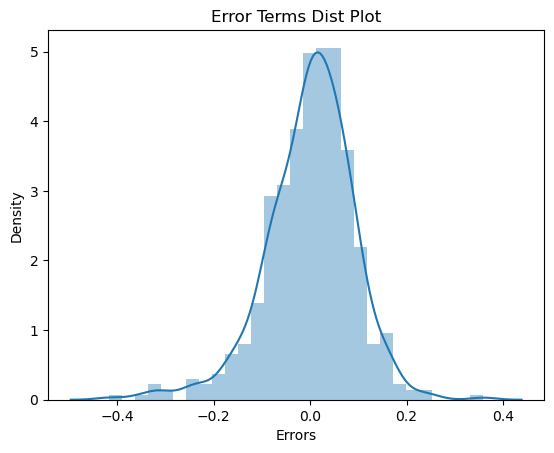

In [243]:
res=y_train-y_train_pred
plt.title("Error Terms Dist Plot")
plt.xlabel("Errors")
sns.distplot(res)
plt.show()

<b>Observation:</b> From about distplot we can infer that the Error terms are following normal distribution

#### Step 6.1: Multi Colinearity

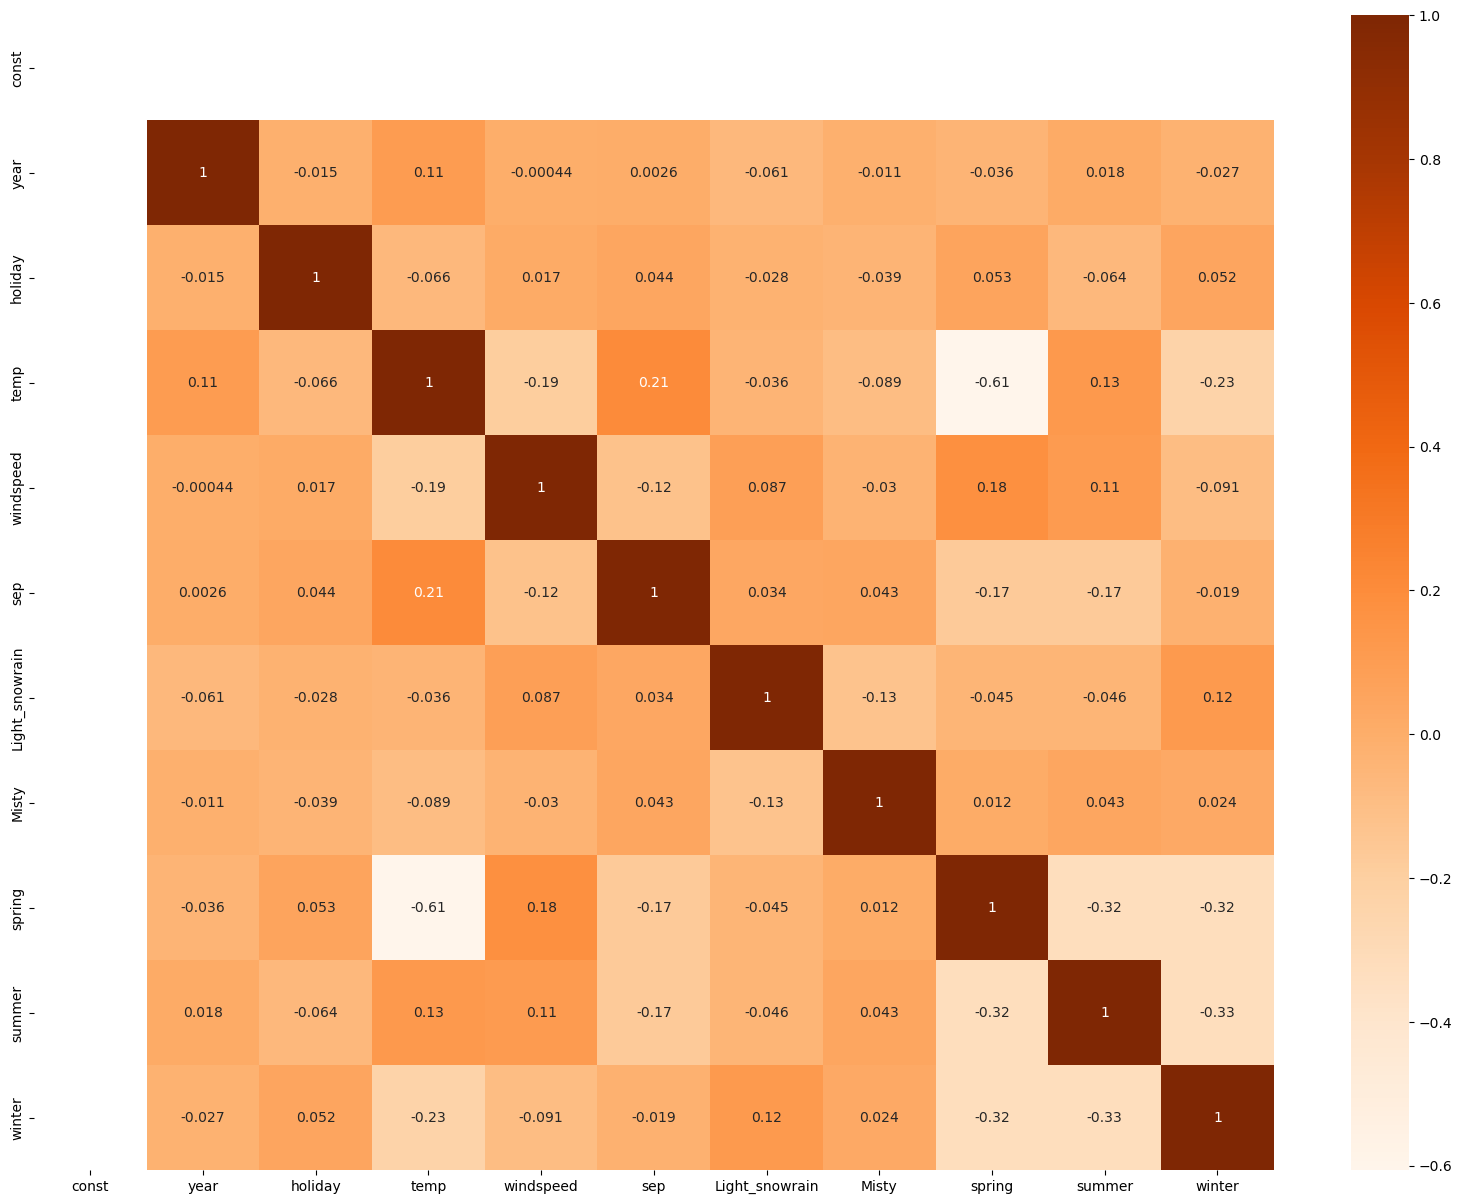

In [246]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_8.corr(),annot=True,cmap="Oranges")
plt.show()

<b>Observation:</b> From the above heatmap we can infer that there is no multi colinearity and VIF is <5

#### Step 6.2: Linearity Check

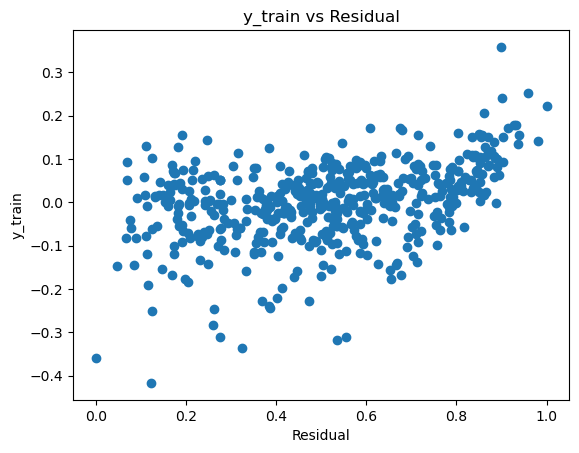

In [256]:
plt.scatter(y_train,res)
plt.xlabel('Residual')
plt.ylabel('y_train')
plt.title('y_train vs Residual')
plt.show()

<b>Observation:</b> From above scatter plot we can infer that there are no visable residuals and no auto correlation

### Step 7: Predictions for Test data

In [275]:
# Applying scaling on test dataset
df_test[num_vars] =scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [276]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [277]:
y_test = df_test.pop('cnt')
X_test = df_test

In [278]:
# adding a constant to test set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,1,0,0,0,0,0,1,0


In [279]:
# Dropping variables and making the test data columns consistant with train set columns to make predictions
columns_in_train_set = X_train_8.columns
X_test_sm = X_test_sm[columns_in_train_set]
X_test_sm

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,0,0,0,0,1
127,1.0,0,0,0.584649,0.069510,0,0,0,0,1,0
640,1.0,1,0,0.745598,0.052115,0,0,1,0,0,1
72,1.0,0,0,0.331557,0.203418,0,0,0,1,0,0


In [280]:
# predict
y_pred = lr_6.predict(X_test_sm)

#### R2 value for Test set prediction

In [281]:
# Evaluate
r2= r2_score(y_true=y_test,y_pred=y_pred)

In [282]:
r2

0.8038195990728844

<b>Observation:</b> We can notice the R2 value for test data is almost same as R2 value of train data which mean model is predicting properly even on unseen data

### Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

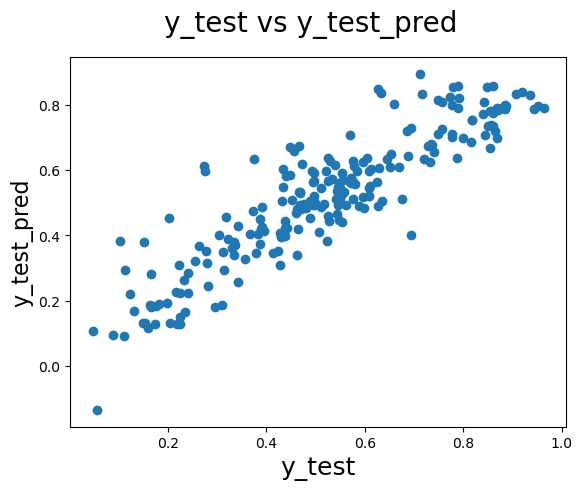

In [286]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)  
plt.xlabel('y_test', fontsize = 18)    
plt.ylabel('y_test_pred', fontsize = 16)

<b>Observation:</b> From above scatter plot we can infer that variance of residuals is constant across the predictions.

In [287]:
# Equation for best fitted line
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

<b>Observation:</b> The equation of best fitted line is
- cnt = 0.1909+0.2341 x year-0.0963 x holiday+0.4777 x temp+-0.1481 x windspeed+0.0910 x sep-0.2850 x Light_snowrain-0.0787 x Misty-0.0554 x spring+0.0621 x summer+0.0945 x winter

In [289]:
# calculating the adjusted r2 for test set
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7739


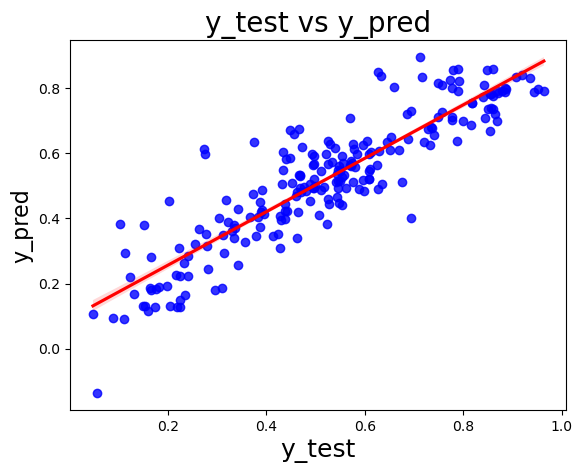

In [290]:
# data visualization on test set
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

<b>Overall Inferences:</b>  
 1. Company should focus on business expansion during Winter and September
 2. During Light_snowrain,Spring,Holiday and windspeed the demand is less
 3. There will be growth in demand year on year when compared to previous year
 4. Based on Temp variable we can say that the demand is high

<b>Conclusion:</b> Company should promote new offers to raise the demand during Light_snowrain,Spring,Holiday and windspeed when it comes to normal stage
<b> Variables that Predict the demand:</b>
 
The variables that helps to make significant predictions in demand are below
 1. year
 2. holiday
 3. temp
 4. windspeed
 5. Month (September)
 6. WeatherSit (Light_snowrain, Misty, spring)
 7. Season (summer,winter)